<a href="https://colab.research.google.com/github/Saultr21/IA-Y-BIGDATA/blob/main/PRO/Convertir_Temperaturas/dataset_y_graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

# ——— 1) Carga el modelo base (.h5) ———
model = tf.keras.models.load_model('celsius_a_fahrenheit.h5')

In [ ]:
# ——— 2) Genera 1 000 valores de Celsius y predice con el modelo ———
celsius = np.random.uniform(-200, 200, size=1000)
fahrenheit_pred = model.predict(celsius.reshape(-1,1)).flatten()

df = pd.DataFrame({
    'celsius': celsius,
    'fahrenheit': fahrenheit_pred
})
df.to_csv('dataset_model.csv', index=False)
print("Dataset generado: dataset_model.csv")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Dataset generado: dataset_model.csv


In [ ]:
# ——— 3) Split: 80% train / 20% test, y reserva 5% de train para validación ———
train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)
train_df, val_df  = train_test_split(train_df, test_size=0.05, random_state=42)

train_df.to_csv('train.csv', index=False)
val_df.to_csv('val.csv',     index=False)
test_df.to_csv('test.csv',   index=False)

print(f"Splits creados → train: {len(train_df)}, val: {len(val_df)}, test: {len(test_df)}")

Splits creados → train: 760, val: 40, test: 200


In [ ]:
# ——— 4) Retraining: compila y entrena el modelo sobre el nuevo dataset ———
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.01),
    loss='mean_squared_error',
    metrics=['mae']
)

history = model.fit(
    train_df['celsius'].values.reshape(-1,1),
    train_df['fahrenheit'].values,
    epochs=100,
    validation_data=(
        val_df['celsius'].values.reshape(-1,1),
        val_df['fahrenheit'].values
    ),
    verbose=1
)

In [ ]:
# ——— 5) Evaluación sobre test set ———
loss, mae = model.evaluate(
    test_df['celsius'].values.reshape(-1,1),
    test_df['fahrenheit'].values,
    verbose=1
)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3053e-09 - mae: 3.4758e-05 
Test Loss: 0.0000, Test MAE: 0.0000


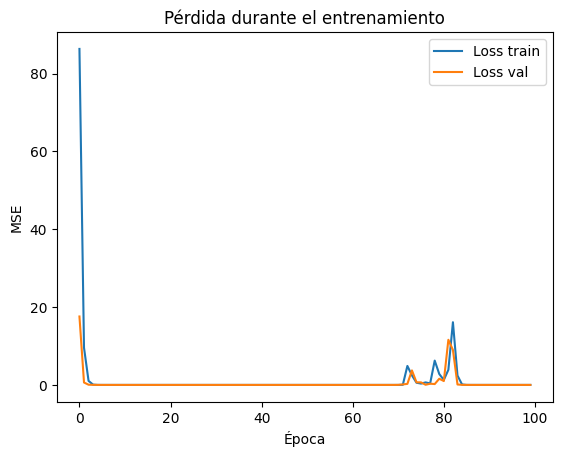

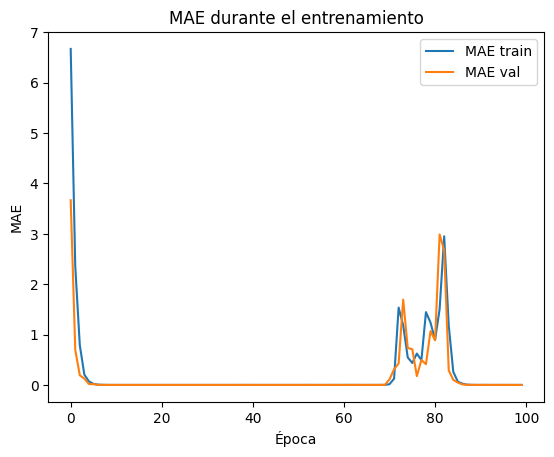

In [ ]:
# ——— 6) Gráficas de pérdida y MAE ———
plt.figure()
plt.plot(history.history['loss'],     label='Loss train')
plt.plot(history.history['val_loss'], label='Loss val')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()
plt.title('Pérdida durante el entrenamiento')
plt.show()

plt.figure()
plt.plot(history.history['mae'],      label='MAE train')
plt.plot(history.history['val_mae'],  label='MAE val')
plt.xlabel('Época')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE durante el entrenamiento')
plt.show()